In [6]:
import pandas as pd
from box import Box
with open('config.yaml') as f:
    cfg = Box.from_yaml(f.read())
import warnings
warnings.filterwarnings('ignore')
from Data_Exploration.data_exploration_main import DataExploration
from Data_Cleansing.data_cleansing_main import DataCleansing
from Data_Preprocessing.data_preprocessing_main import DataPreprocessing, TargetEncoding, BinaryEncoding, OrdinalEncoding, FeatureScaling
from Data_Preprocessing.feature_engineering import FeatureEngineering
from Data_Analyzing.data_analysis_main import DataAnalysis
from Data_Analyzing.feature_selection import FeatureSelection

In [35]:
# data_exp = DataExploration()
# df = data_exp.load_data('./data/raw_data/SWCC.csv', index_col=0, parse_dates=True)
# df.head()

In [36]:
# df_sample = df.head(1000)
# df_sample.to_csv('./data/SWCC_sample_1000.csv')

In [37]:
# data = pd.read_pickle('./data/raw_data/coyote_data_0731.pkl')
# data.head()

In [38]:
# data_sample = data.head(1000)
# # move TotalCostUSD to the first column
# cols = list(data_sample.columns)
# cols.insert(0, cols.pop(cols.index('TotalCostUSD')))
# data_sample = data_sample.loc[:, cols]
# data_sample.to_excel('./data/coyote_0731_1000.xlsx', index=False)

### Test DataExploration Module

In [39]:
data_exp = DataExploration()

load_data() function

In [4]:
data_exp = DataExploration()

# df = data_exp.load_data('./data/lng_data_sample.csv', parse_dates=True, index_col=0)
# df = data_exp.load_data('./data/sasol_data_sample.csv', parse_dates=True, index_col=0)
# df = data_exp.load_data('./data/coyote_data_sample_100.xlsx', parse_dates=False, index_col=0)
df = data_exp.load_data('./data/coyote_data_sample_1000.pickle', parse_dates=False, index_col=0)
# df = data_exp.load_data('./data/coyote_0731_1000.xlsx', parse_dates=False, index_col=False)
# df = data_exp.load_data('./data/Essar_RE_Boilers_B21_sample.csv', parse_dates=True, index_col=0)
# df = data_exp.load_data('./data/Savola_RO_BLEACHING_sample.csv', parse_dates=True, index_col=0)
# df = data_exp.load_data('./data/SWCC_sample_1000.csv', parse_dates=True, index_col=0)

In [41]:
df.head()

,IsCustomerHighPriority,IsCommodityStackable,CommodityID,CommodityCode,BizUnit,NormalizedEQ,NormalizedLoadRank,BookType,BuildType,NormalizedCustomerSalesStatus,...,TRUCKD11,DJTA,DTB3,GASREGW,IPG2122N,IPG3361T3S,GDP,PPIACO,BUSINV,PCU48414841
LoadID,,,,,,,,,,,,,,,,,,,,,
18503541,False,False,0.0,,Core,V,Spot,Prebook,PreBuild,Non-Enterprise,...,116.1,10994.31,1.51,2.571,93.274,103.129,21538.032,199.3,2037185.0,152.2
18503542,False,False,0.0,,Core,V,Spot,Prebook,PreBuild,Non-Enterprise,...,116.1,10994.31,1.51,2.571,93.274,103.129,21538.032,199.3,2037185.0,152.2
18503953,False,False,0.0,MISC,Core,V,Spot,Prebook,PreBuild,Managed,...,116.1,10994.31,1.51,2.571,93.274,103.129,21538.032,199.3,2037185.0,152.2
18503956,False,False,0.0,MISC,Core,V,Spot,Prebook,PreBuild,Managed,...,116.1,10994.31,1.51,2.571,93.274,103.129,21538.032,199.3,2037185.0,152.2
18504283,False,False,0.0,ca,Core,F,Spot,SameDay,SameDayBuild,Non-Enterprise,...,116.1,10994.31,1.51,2.571,93.274,103.129,21538.032,199.3,2037185.0,152.2


In [42]:
# df.iloc[0:10, 0] = None

get_data_size() function

In [43]:
data_exp.get_data_size()

Data size: (1000, 96)


get_data_type() &  summarize_data_type() function

In [44]:
data_exp.get_data_type(df,df.columns[0])

Data type of column IsCustomerHighPriority is:  bool


In [5]:
data_exp.summarize_data_type()

Data types summary:
 float64           39
bool              17
object            13
int64              7
datetime64[ns]     3
category           2
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
period[D]          1
Name: count, dtype: int64


summarize_missing_data() function

In [46]:
data_exp.summarize_missing_data()

Missing data summary:
CommodityCode     892
MXCrossBorder    1000
dtype: int64


visualize_missing_data() function

In [47]:
# data_exp.visualize_missing_data()

In [48]:
from Data_Visualization.eda import EDA_Visualization

eda_vis = EDA_Visualization(df)
eda_vis.visualize_missing_data()

### Test DataCleansing Module

In [49]:
data_cleansing = DataCleansing(df)

remove_duplicates() function

In [50]:
# generate a df with duplicate rows
dup_df = pd.DataFrame({'a':[1,1,2,2,3,3,4,4,5,5],
                     'b':[2,2,3,3,4,4,5,5,6,6],
                        'c':[3,3,4,4,5,5,6,6,7,7]})
dup_df

,a,b,c
0,1,2,3
1,1,2,3
2,2,3,4
3,2,3,4
4,3,4,5
5,3,4,5
6,4,5,6
7,4,5,6
8,5,6,7
9,5,6,7


In [51]:
data_cleansing = DataCleansing()
dup_df = data_cleansing.remove_duplicates(dup_df)
dup_df

,a,b,c
0,1,2,3
1,2,3,4
2,3,4,5
3,4,5,6
4,5,6,7


In [52]:
# a df with duplicate dolumns
dup_df = pd.DataFrame({'a': [1, 2, 3], 'b': [1, 2, 3], 'c': [1, 2, 3]})
dup_df

,a,b,c
0,1,1,1
1,2,2,2
2,3,3,3


In [53]:
data_cleansing = DataCleansing()
dup_df = data_cleansing.remove_duplicates(dup_df)
dup_df

,a,b,c
0,1,1,1
1,2,2,2
2,3,3,3


handle_missing_values() funtion

In [54]:
df.shape

(1000, 96)

In [55]:
data_exp.summarize_missing_data(df)

Missing data summary:
CommodityCode     892
MXCrossBorder    1000
dtype: int64


In [56]:
# df = data_cleansing.handle_missing_values(df, target_list=['OXO-5FI696 Augusta'], drop_thresh=0.5, fill_missing_method='forward')
df = data_cleansing.handle_missing_values(df, target_list=['HPBH:221F008 Stanlow', 'HPBH:221FT009 Stanlow'], drop_thresh=0.5, fill_missing_method='mean')

KeyError: ['HPBH:221F008 Stanlow', 'HPBH:221FT009 Stanlow']

In [ ]:
df.shape

(100, 96)

In [ ]:
data_exp.summarize_missing_data(df)

Missing data summary:
CommodityCode     79
MXCrossBorder    100
dtype: int64


detect_anomalies() function

In [ ]:
# data_cleansing.generate_anomaly_report(df, 'OXO-5FI696 Augusta', problem_type='max')
data_cleansing.generate_anomaly_report(df, 'HPBH:221F008 Stanlow', problem_type='max')

detect_outliers() funcion

In [ ]:
data_cleansing.detect_outliers(df, col_name=df.columns[10], threshold=3)

Missing values detected in MXCrossBorder , please handle missing values first


### Test DataPreprocessing Module

feature_encoding()

In [ ]:
data_exp = DataExploration()
df = data_exp.load_data('./data/coyote_0731_1000.xlsx', parse_dates=False, index_col=False)

In [ ]:
data_exp.summarize_data_type(df)

Data types summary:
 int64      39
float64    29
bool       20
object     11
Name: count, dtype: int64


In [ ]:
be = BinaryEncoding(df, ['TotalCostUSD'])
bool_cols = be.get_columns()
df[bool_cols].head()

,Concealed,Team,Private,Rolled,TankerContainer,TankerLiquid,TankerFood,TankerReefer,TankerHazMat,Hot,Liquor,TWIC,TMSPrivateCarrier,Govt,HRHV,Seal,IsCustomerHighPriority,IsCommodityStackable,MXCrossBorder,CACrossBorder
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = be.encode()
df[bool_cols].head()

,Concealed,Team,Private,Rolled,TankerContainer,TankerLiquid,TankerFood,TankerReefer,TankerHazMat,Hot,Liquor,TWIC,TMSPrivateCarrier,Govt,HRHV,Seal,IsCustomerHighPriority,IsCommodityStackable,MXCrossBorder,CACrossBorder
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_exp.summarize_data_type(df)

Data types summary:
 int64      59
float64    29
object     11
Name: count, dtype: int64


In [ ]:
te = TargetEncoding(df, ['TotalCostUSD'])
categorical_cols = te.get_columns()
df[categorical_cols].head()

,EquipmentType,NormalizedRank,Normalized_EQ,BizUnit,BookType,BuildType,SalesStatus,CommodityCode,LoadDate-Weekday,DelDate-Weekday,CreateDate-Weekday
0,V,Spot,V,Core,SameDay,SameDayBuild,Non-Enterprise,NaN,Friday,Monday,Friday
1,V,Spot,V,Core,Prebook,PreBuild,Non-Enterprise,NaN,Tuesday,Wednesday,Friday
2,F,Primary,F,Core,Prebook,PreBuild,Managed,NaN,Monday,Tuesday,Friday
3,V,Primary,V,Core,SameDay,SameDayBuild,Non-Enterprise,NaN,Friday,Friday,Friday
4,V,Spot,V,Core,SameDay,SameDayBuild,Non-Enterprise,NaN,Friday,Wednesday,Friday


In [ ]:
df = te.encode()
df[categorical_cols].head()

,EquipmentType,NormalizedRank,Normalized_EQ,BizUnit,BookType,BuildType,SalesStatus,CommodityCode,LoadDate-Weekday,DelDate-Weekday,CreateDate-Weekday
0,1167.846730,1276.082259,1285.489573,1397.622783,1362.821291,931.475097,1308.222838,1321.638651,1127.472760,1446.114308,1414.839236
1,1167.846730,1276.082259,1285.489573,1397.622783,1525.869119,1781.346110,1308.222838,1321.638651,1658.687189,1316.577477,1414.839236
2,1163.274645,1568.820526,1419.329335,1397.622783,1525.869119,1781.346110,745.107322,1321.638651,1406.654348,1268.843787,1414.839236
3,1167.846730,1568.820526,1285.489573,1397.622783,1362.821291,931.475097,1308.222838,1321.638651,1127.472760,1774.547673,1414.839236
4,1167.846730,1276.082259,1285.489573,1397.622783,1362.821291,931.475097,1308.222838,1321.638651,1127.472760,1316.577477,1414.839236


In [ ]:
data_exp.summarize_data_type(df)

Data types summary:
 int64      59
float64    40
Name: count, dtype: int64


feature_scaling()

In [ ]:
minmax_scaling = FeatureScaling(df, ['TotalCostUSD'])
numerical_cols = minmax_scaling.get_columns()
df[numerical_cols]

,Mode,ProgressType,Type,StateType,LoadingPosition,Plan,ShipmentType,EquipmentType,EquipmentLength,EquipmentWidth,...,TRUCKD11,DJTA,DTB3,GASREGW,IPG2122N,IPG3361T3S,GDP,PPIACO,BUSINV,PCU48414841
0,2,8,1,1,0,0,1,1167.846730,53,0,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137
1,1,8,1,1,2,0,1,1167.846730,53,0,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137
2,1,8,2,1,2,0,5,1163.274645,48,0,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137
3,1,8,1,1,2,0,1,1167.846730,48,0,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137
4,2,8,1,1,0,0,1,1167.846730,53,0,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,8,1,1,2,0,0,1429.052565,53,0,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137
996,1,8,1,1,2,0,1,1167.846730,53,0,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137
997,1,8,1,1,2,0,1,1414.839236,18,0,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137
998,1,8,1,1,2,0,0,1167.846730,53,102,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137


In [ ]:
df = minmax_scaling.scale(method="minmax")
df[numerical_cols]

,Mode,ProgressType,Type,StateType,LoadingPosition,Plan,ShipmentType,EquipmentType,EquipmentLength,EquipmentWidth,...,TRUCKD11,DJTA,DTB3,GASREGW,IPG2122N,IPG3361T3S,GDP,PPIACO,BUSINV,PCU48414841
0,0.5,0.428571,0.0,0.0,0.0,0.0,0.166667,0.003914,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.428571,0.0,0.0,1.0,0.0,0.166667,0.003914,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.428571,1.0,0.0,1.0,0.0,0.833333,0.000000,0.905660,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.428571,0.0,0.0,1.0,0.0,0.166667,0.003914,0.905660,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.428571,0.0,0.0,0.0,0.0,0.166667,0.003914,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.428571,0.0,0.0,1.0,0.0,0.000000,0.227545,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.428571,0.0,0.0,1.0,0.0,0.166667,0.003914,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.428571,0.0,0.0,1.0,0.0,0.166667,0.215377,0.339623,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.428571,0.0,0.0,1.0,0.0,0.000000,0.003914,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_exp.summarize_data_type(df)

Data types summary:
 float64    99
Name: count, dtype: int64


encoding & scaling

In [ ]:
df = data_exp.load_data('./data/coyote_0731_1000.xlsx', parse_dates=False, index_col=False)

In [ ]:
data_preprocessing = DataPreprocessing(df, ['TotalCostUSD'])

In [ ]:
df.head()

,TotalCostUSD,Mode,ProgressType,Type,StateType,LoadingPosition,Plan,ShipmentType,EquipmentType,EquipmentLength,...,TRUCKD11,DJTA,DTB3,GASREGW,IPG2122N,IPG3361T3S,GDP,PPIACO,BUSINV,PCU48414841
0,423.82,2,8,1,1,0,0,1,V,53,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137
1,1300.00,1,8,1,1,2,0,1,V,53,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137
2,300.00,1,8,2,1,2,0,5,F,48,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137
3,873.00,1,8,1,1,2,0,1,V,48,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137
4,267.48,2,8,1,1,0,0,1,V,53,...,115.9,13738.04,4.2,3.239,91.7098,102.9025,26137.992,257.897,2545624,207.137


In [ ]:
df = data_preprocessing.feature_encoding()
df = data_preprocessing.feature_scaling(df)
df.head()

,Mode,ProgressType,Type,StateType,LoadingPosition,Plan,ShipmentType,EquipmentType,EquipmentLength,EquipmentWidth,...,DJTA,DTB3,GASREGW,IPG2122N,IPG3361T3S,GDP,PPIACO,BUSINV,PCU48414841,TotalCostUSD
0,0.5,0.428571,0.0,0.0,0.0,0.0,0.166667,0.003914,1.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,423.82
1,0.0,0.428571,0.0,0.0,1.0,0.0,0.166667,0.003914,1.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1300.00
2,0.0,0.428571,1.0,0.0,1.0,0.0,0.833333,0.000000,0.90566,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.00
3,0.0,0.428571,0.0,0.0,1.0,0.0,0.166667,0.003914,0.90566,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,873.00
4,0.5,0.428571,0.0,0.0,0.0,0.0,0.166667,0.003914,1.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,267.48


In [ ]:
data_exp.summarize_data_type(df)

Data types summary:
 float64    99
Name: count, dtype: int64


data resampling

In [7]:
data_exp = DataExploration()
df = data_exp.load_data('./data/raw_data/lng_alldata_1000.csv', parse_dates=True, index_col=0)
print(df.shape)
df.head()

(1000, 2166)


,3P1402_1:314T109.PNT,3T1413_GW2:314L804.PNT,3A1423_3:314LT810.PNT,3E1401_1:314T003.PNT,3KT1410_1:314T157.PNT,3E1560_1:315T028.PNT,3V1104_1:311T012.PNT,3P1101_GW2:311PZ202.PNT,3V1401_1:314P182.PNT,3V1410_1:314T056.PNT,...,3C1560_1:315Q011.PNT,3V1410_3:314FC015.MEAS,3V1411_1:314Q030.PNT,3F4110_1:341GZ112C.CIN,3K1410_GW6:314T818.PNT,3V1102_2:311FC030.SPT,3GT1410_2GW7:3141TTXD1_4.PNT,AIN1_1_SGSA:344TZ012.PNT,3GT1401_1:314Q044.PNT,3V4410_2:344FV026.OUT
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,52.998047,51.953602,62.005859,20.806641,29.855774,29.582031,28.882812,0.895136,7.013437,-29.069336,...,0.401367,0.0,1.465137,CLOSED,79.882446,21.284224,532.879395,33.150177,2.029439,-5.0
2020-01-01 00:10:00,52.998047,52.197803,72.490234,20.802734,29.802856,29.582031,28.882812,0.895136,7.013437,-28.656250,...,0.401367,0.0,1.465137,CLOSED,79.749573,21.270844,533.373291,32.142849,2.029439,-5.0
2020-01-01 00:20:00,52.998047,52.319904,57.939453,20.810547,29.555904,29.582031,28.882812,0.895136,7.014609,-29.447266,...,0.401367,0.0,1.456055,CLOSED,79.706665,21.396782,532.350220,32.142849,2.029439,-5.0
2020-01-01 00:30:00,52.998047,52.045177,68.265625,20.789062,29.326591,29.582031,28.882812,0.895136,7.014609,-28.612305,...,0.401367,0.0,1.465137,CLOSED,79.621475,21.290522,531.732849,32.142849,2.029439,-5.0
2020-01-01 00:40:00,52.998047,52.319904,62.250000,20.763672,29.132557,29.582031,28.882812,0.895136,7.012266,-28.814453,...,0.401367,0.0,1.456055,CLOSED,79.515244,21.303116,532.279663,32.142849,2.029439,-5.0


In [ ]:
data_exploration = DataExploration()
data_exploration.summarize_data_type(df)

Data types summary:
 float64    2027
object      139
Name: count, dtype: int64


In [ ]:
# show first Object data column
df.select_dtypes(include=['object']).head()

,3V1105_GW2:311LZ006M.COUT,3C1401_GW2:314TZ755M.COUT,3F4110_1:341GZ101C.CIN,3V1101_1:311G001C.CIN,3F4110_1:341G026O.CIN,3C1401_1:314G750C.CIN,3V4103_GW2:344TZ041U.CIN,3K1410_GW2:314UZ815U.CIN,3F4110_1:341G059C.CIN,3F4110_1:341GZ108C.CIN,...,3P1101_GW2:311FZ019U.CIN,3F4110_1:341GZ110C.CIN,3E1407_GW2:344TZ044M.COUT,3C1101_1:311G003C.CIN,3V4410_1:344G003O.CIN,3F4110_1:341GZ051O.CIN,3F4110_1:341GZ031C.CIN,3V4410_GW2:344UZ322T.CIN,3K1430_1:314G038O.CIN,3F4110_1:341GZ112C.CIN
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,N_OPEN,N_OPEN,CLOSED,N_CLOSED,OPEN,CLOSED,N_OPEN,N_OPEN,N_CLOSED,CLOSED,...,N_OPEN,CLOSED,N_OPEN,N_CLOSED,OPEN,N_OPEN,CLOSED,OPEN,N_OPEN,CLOSED
2020-01-01 00:10:00,N_OPEN,N_OPEN,CLOSED,N_CLOSED,OPEN,CLOSED,N_OPEN,N_OPEN,N_CLOSED,CLOSED,...,N_OPEN,CLOSED,N_OPEN,N_CLOSED,OPEN,N_OPEN,CLOSED,OPEN,N_OPEN,CLOSED
2020-01-01 00:20:00,N_OPEN,N_OPEN,CLOSED,N_CLOSED,OPEN,CLOSED,N_OPEN,N_OPEN,N_CLOSED,CLOSED,...,N_OPEN,CLOSED,N_OPEN,N_CLOSED,OPEN,N_OPEN,CLOSED,OPEN,N_OPEN,CLOSED
2020-01-01 00:30:00,N_OPEN,N_OPEN,CLOSED,N_CLOSED,OPEN,CLOSED,N_OPEN,N_OPEN,N_CLOSED,CLOSED,...,N_OPEN,CLOSED,N_OPEN,N_CLOSED,OPEN,N_OPEN,CLOSED,OPEN,N_OPEN,CLOSED
2020-01-01 00:40:00,N_OPEN,N_OPEN,CLOSED,N_CLOSED,OPEN,CLOSED,N_OPEN,N_OPEN,N_CLOSED,CLOSED,...,N_OPEN,CLOSED,N_OPEN,N_CLOSED,OPEN,N_OPEN,CLOSED,OPEN,N_OPEN,CLOSED


In [ ]:
dp = DataPreprocessing(df, ['3GT1401_3:314FT010.PNT'])
df = dp.feature_encoding(df)
data_exploration.summarize_data_type(df)

Data types summary:
 float64    2166
Name: count, dtype: int64


In [ ]:
df = dp.data_resampling(df, 'h')
df.head()

,3P1402_1:314T109.PNT,3T1413_GW2:314L804.PNT,3A1423_3:314LT810.PNT,3E1401_1:314T003.PNT,3KT1410_1:314T157.PNT,3E1560_1:315T028.PNT,3V1104_1:311T012.PNT,3P1101_GW2:311PZ202.PNT,3V1401_1:314P182.PNT,3V1410_1:314T056.PNT,...,3V1410_3:314FC015.MEAS,3V1411_1:314Q030.PNT,3F4110_1:341GZ112C.CIN,3K1410_GW6:314T818.PNT,3V1102_2:311FC030.SPT,3GT1410_2GW7:3141TTXD1_4.PNT,AIN1_1_SGSA:344TZ012.PNT,3GT1401_1:314Q044.PNT,3V4410_2:344FV026.OUT,3GT1401_3:314FT010.PNT
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,52.998047,52.218153,64.589844,20.806641,29.453007,29.582031,28.882812,0.895136,7.013008,-28.891602,...,0.0,1.462109,9976.232628,79.679461,21.301672,532.112081,32.310737,2.029439,-5.0,9872.846517
2020-01-01 01:00:00,52.998047,52.263941,64.867839,20.805664,28.876786,29.582031,28.667969,0.895136,7.004219,-28.416016,...,0.0,1.469775,9976.232628,79.780029,21.246181,528.475423,30.860799,2.029439,-5.0,9888.568034
2020-01-01 02:00:00,52.998047,51.928165,64.997070,20.873372,28.709212,29.246094,28.625000,0.886892,6.998633,-28.625488,...,0.0,1.468262,9976.232628,79.372106,21.306395,526.341064,29.578747,2.029439,-5.0,9899.958171
2020-01-01 03:00:00,52.998047,51.460115,64.961263,20.831055,28.491658,29.078125,28.625000,0.886892,7.002031,-29.092285,...,0.0,1.463623,9976.232628,79.646622,23.083295,525.785411,28.937723,2.029439,-5.0,9883.221354
2020-01-01 04:00:00,52.998047,50.854701,64.830078,20.871745,28.388762,29.078125,28.625000,0.886892,7.001719,-29.148438,...,0.0,1.469727,9976.232628,79.381485,26.649424,523.483480,28.365378,2.029439,-5.0,9892.548665


data splitting

In [ ]:
df = data_exp.load_data('./data/coyote_0731_1000.xlsx', parse_dates=False, index_col=False)
df.shape

(1000, 99)

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = dp.data_splitting(df, [cfg.target_var.coyote])
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((800, 98), (100, 98), (100, 98), (800, 1), (100, 1), (100, 1))

feature engineering

In [ ]:
de = DataExploration()
df = de.load_data('./data/sasol_data_sample.csv', parse_dates=True, index_col=0)
df.head()

,OXO-5FI635C Augusta,OXO-5FI661A Augusta,OXO-5FI696 Augusta,OXO-5FIC132 Augusta,OXO-5FIC600 Augusta,OXO-5FIC601 Augusta,OXO-5FIC602 Augusta,OXO-5FIC603 Augusta,OXO-5FIC606A Augusta,OXO-5FIC606C Augusta,...,OXO-5TIC603 Augusta,OXO-5TIC604 Augusta,OXO-5TIC605 Augusta,OXO-5TIC606 Augusta,OXO-5TIC607 Augusta,OXO-5TIC659 Augusta,OXO-_5FI658A Augusta,OXO-_5FI659A Augusta,OXO-_5FI660A Augusta,OXO-_5FI662A Augusta
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-01 00:00:00,5859.125648,23345.857389,9830.200195,4.450549,2076.174093,67.208298,5069.174366,0.0,NaN,1.202029,...,133.996300,130.578919,133.007764,134.032267,130.899539,298.029910,21719.630615,22870.976318,22026.824772,22036.315560
2019-11-01 01:00:00,5950.173837,23346.553467,9384.632992,4.410112,2070.199284,67.204392,5068.014148,0.0,NaN,1.158160,...,133.994588,130.640505,132.966600,134.035076,130.849780,298.084330,21727.622575,22879.205452,22042.948193,22056.644971
2019-11-01 02:00:00,6379.102250,23430.336545,9233.277262,4.285714,2067.933828,67.031974,5069.603650,0.0,NaN,1.070420,...,134.008106,130.675602,133.035094,134.001994,130.743083,297.930878,21836.766659,22970.057215,22156.774258,22105.218684
2019-11-01 03:00:00,6337.343084,23384.694743,9223.139014,4.775281,2062.488529,66.808810,5061.608939,0.0,NaN,1.044098,...,134.008312,130.613462,133.000552,133.979115,130.760757,298.052583,21783.450505,22920.952018,22088.356950,22064.178402
2019-11-01 04:00:00,6183.590302,23357.085677,9104.168620,4.388889,2055.162223,66.354369,5004.132636,0.0,NaN,1.044098,...,134.002098,130.614549,133.004748,134.000492,130.814450,298.039928,21748.715137,22895.312126,22073.622298,22053.480892


In [ ]:
fe = FeatureEngineering(df)
df = fe.add_time_lag_features(df, col_list=[cfg.target_var.sasol], max_lag=1)
df.head()

,OXO-5FI635C Augusta,OXO-5FI661A Augusta,OXO-5FI696 Augusta,OXO-5FIC132 Augusta,OXO-5FIC600 Augusta,OXO-5FIC601 Augusta,OXO-5FIC602 Augusta,OXO-5FIC603 Augusta,OXO-5FIC606A Augusta,OXO-5FIC606C Augusta,...,OXO-5TIC604 Augusta,OXO-5TIC605 Augusta,OXO-5TIC606 Augusta,OXO-5TIC607 Augusta,OXO-5TIC659 Augusta,OXO-_5FI658A Augusta,OXO-_5FI659A Augusta,OXO-_5FI660A Augusta,OXO-_5FI662A Augusta,OXO-5FI696 Augusta_time_lag_1
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-01 00:00:00,5859.125648,23345.857389,9830.200195,4.450549,2076.174093,67.208298,5069.174366,0.0,NaN,1.202029,...,130.578919,133.007764,134.032267,130.899539,298.029910,21719.630615,22870.976318,22026.824772,22036.315560,NaN
2019-11-01 01:00:00,5950.173837,23346.553467,9384.632992,4.410112,2070.199284,67.204392,5068.014148,0.0,NaN,1.158160,...,130.640505,132.966600,134.035076,130.849780,298.084330,21727.622575,22879.205452,22042.948193,22056.644971,9830.200195
2019-11-01 02:00:00,6379.102250,23430.336545,9233.277262,4.285714,2067.933828,67.031974,5069.603650,0.0,NaN,1.070420,...,130.675602,133.035094,134.001994,130.743083,297.930878,21836.766659,22970.057215,22156.774258,22105.218684,9384.632992
2019-11-01 03:00:00,6337.343084,23384.694743,9223.139014,4.775281,2062.488529,66.808810,5061.608939,0.0,NaN,1.044098,...,130.613462,133.000552,133.979115,130.760757,298.052583,21783.450505,22920.952018,22088.356950,22064.178402,9233.277262
2019-11-01 04:00:00,6183.590302,23357.085677,9104.168620,4.388889,2055.162223,66.354369,5004.132636,0.0,NaN,1.044098,...,130.614549,133.004748,134.000492,130.814450,298.039928,21748.715137,22895.312126,22073.622298,22053.480892,9223.139014


In [ ]:
df = fe.add_time_features(df)
df.head()

,OXO-5FI635C Augusta,OXO-5FI661A Augusta,OXO-5FI696 Augusta,OXO-5FIC132 Augusta,OXO-5FIC600 Augusta,OXO-5FIC601 Augusta,OXO-5FIC602 Augusta,OXO-5FIC603 Augusta,OXO-5FIC606A Augusta,OXO-5FIC606C Augusta,...,OXO-_5FI659A Augusta,OXO-_5FI660A Augusta,OXO-_5FI662A Augusta,OXO-5FI696 Augusta_time_lag_1,year,month,day,day_of_week,day_of_year,week_of_year
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-01 00:00:00,5859.125648,23345.857389,9830.200195,4.450549,2076.174093,67.208298,5069.174366,0.0,NaN,1.202029,...,22870.976318,22026.824772,22036.315560,NaN,2019,11,1,4,305,44
2019-11-01 01:00:00,5950.173837,23346.553467,9384.632992,4.410112,2070.199284,67.204392,5068.014148,0.0,NaN,1.158160,...,22879.205452,22042.948193,22056.644971,9830.200195,2019,11,1,4,305,44
2019-11-01 02:00:00,6379.102250,23430.336545,9233.277262,4.285714,2067.933828,67.031974,5069.603650,0.0,NaN,1.070420,...,22970.057215,22156.774258,22105.218684,9384.632992,2019,11,1,4,305,44
2019-11-01 03:00:00,6337.343084,23384.694743,9223.139014,4.775281,2062.488529,66.808810,5061.608939,0.0,NaN,1.044098,...,22920.952018,22088.356950,22064.178402,9233.277262,2019,11,1,4,305,44
2019-11-01 04:00:00,6183.590302,23357.085677,9104.168620,4.388889,2055.162223,66.354369,5004.132636,0.0,NaN,1.044098,...,22895.312126,22073.622298,22053.480892,9223.139014,2019,11,1,4,305,44


In [ ]:
df = de.load_data('./data/SWCC_sample_1000.csv', parse_dates=True, index_col=0)
df.head()

,80GAF30CP001.XQ01 Ras Al-Khair,80GAF30CP002.XQ01 Ras Al-Khair,80GAF30CQ001.XQ01 Ras Al-Khair,80GAF30CQ002.XQ01 Ras Al-Khair,80GAF30CQ003.XQ01 Ras Al-Khair,80GAF30CQ004.XQ01 Ras Al-Khair,80GAF30CQ005.XQ01 Ras Al-Khair,80GAF30CQ006.XQ01 Ras Al-Khair,80GAF30CT001.XQ01 Ras Al-Khair,80GAF30CT002.XQ01 Ras Al-Khair,...,82GEV00CP001.XV03 Ras Al-Khair,82GEV00CQ001.XQ01 Ras Al-Khair,82GEV00CT001.XQ01 Ras Al-Khair,82GEV05CQ001.XQ01 Ras Al-Khair,82GEV05CQ002.XQ01 Ras Al-Khair,82GEV05CQ003.XQ01 Ras Al-Khair,82GEV05CQ005.XQ01 Ras Al-Khair,82GEV05CQ006.XQ01 Ras Al-Khair,82GEV05CQ007.XQ01 Ras Al-Khair,82GEV05CQ008.XQ01 Ras Al-Khair
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2.022105,1.955963,0.004200,-18.89949,62.556573,1.269097,7.982784,0.018975,19.333120,19.226244,...,0.593945,1.007940,26.463205,0.001075,0.072269,521.976229,-0.001308,60522.442833,6.340481,3.564636
2020-01-01 01:00:00,2.032036,1.967390,0.004115,NaN,62.628020,1.200446,7.982205,0.019771,19.275465,19.164369,...,0.591924,1.007929,26.403744,NaN,0.074882,272.794585,-0.001683,60412.080857,6.333336,NaN
2020-01-01 02:00:00,2.030507,1.966513,0.004243,NaN,62.461891,1.193488,7.977813,NaN,19.239994,19.134638,...,0.589208,1.007966,26.313748,NaN,0.095588,213.760548,-0.001188,60237.838714,6.336653,NaN
2020-01-01 03:00:00,2.029290,1.964664,0.004167,NaN,62.615500,1.431394,7.973681,NaN,19.237494,19.132496,...,0.587167,1.007972,26.279994,NaN,0.072197,189.206165,-0.001698,60625.976313,6.335094,NaN
2020-01-01 04:00:00,2.015641,1.952224,0.004275,NaN,62.592892,1.431766,7.968629,NaN,19.227851,19.128210,...,0.593460,1.007963,26.330622,NaN,0.072127,172.814084,-0.001200,60593.791267,6.331321,NaN


In [ ]:
fe = FeatureEngineering(df)
df = fe.transform_gain(df)
df.head()

,80GAF30CP001.XQ01 Ras Al-Khair,80GAF30CP002.XQ01 Ras Al-Khair,80GAF30CQ001.XQ01 Ras Al-Khair,80GAF30CQ002.XQ01 Ras Al-Khair,80GAF30CQ003.XQ01 Ras Al-Khair,80GAF30CQ004.XQ01 Ras Al-Khair,80GAF30CQ005.XQ01 Ras Al-Khair,80GAF30CQ006.XQ01 Ras Al-Khair,80GAF30CT001.XQ01 Ras Al-Khair,80GAF30CT002.XQ01 Ras Al-Khair,...,82GEV00CP001.XV03 Ras Al-Khair,82GEV00CQ001.XQ01 Ras Al-Khair,82GEV00CT001.XQ01 Ras Al-Khair,82GEV05CQ001.XQ01 Ras Al-Khair,82GEV05CQ002.XQ01 Ras Al-Khair,82GEV05CQ003.XQ01 Ras Al-Khair,82GEV05CQ005.XQ01 Ras Al-Khair,82GEV05CQ006.XQ01 Ras Al-Khair,82GEV05CQ007.XQ01 Ras Al-Khair,82GEV05CQ008.XQ01 Ras Al-Khair
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 01:00:00,0.009931,0.011427,-0.000085,NaN,0.071447,-0.068651,-0.000579,0.000796,-0.057656,-0.061875,...,-0.002021,-0.000011,-0.059462,NaN,0.002613,-249.181644,-0.000375,-110.361976,-0.007145,NaN
2020-01-01 02:00:00,-0.001529,-0.000877,0.000128,NaN,-0.166129,-0.006957,-0.004392,NaN,-0.035471,-0.029731,...,-0.002716,0.000037,-0.089996,NaN,0.020705,-59.034037,0.000495,-174.242143,0.003317,NaN
2020-01-01 03:00:00,-0.001217,-0.001850,-0.000075,NaN,0.153609,0.237906,-0.004132,NaN,-0.002500,-0.002143,...,-0.002041,0.000006,-0.033754,NaN,-0.023391,-24.554383,-0.000510,388.137598,-0.001559,NaN
2020-01-01 04:00:00,-0.013649,-0.012440,0.000107,NaN,-0.022608,0.000372,-0.005052,NaN,-0.009644,-0.004286,...,0.006293,-0.000009,0.050628,NaN,-0.000070,-16.392081,0.000498,-32.185046,-0.003773,NaN
2020-01-01 05:00:00,0.007781,0.008071,-0.000169,NaN,0.114566,-0.097017,-0.002414,NaN,-0.012858,-0.018213,...,-0.002304,NaN,-0.059632,NaN,-0.000511,-8.774637,-0.000244,-108.133917,-0.005497,NaN


### Test DataAnalysis Module

correlation_analysis

In [2]:
data_exp = DataExploration()
df = data_exp.load_data('./data/sasol_data_sample.csv', parse_dates=True, index_col=0)
da = DataAnalysis(df,'OXO-5FI635C Augusta')
da.correlation_analysis()

variance_analysis

In [3]:
da = DataAnalysis()
df = data_exp.load_data('./data/sasol_data_sample.csv', parse_dates=True, index_col=0)
da.variance_analysis(df)

feature_selection

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:02<00:00,  9.85it/s]


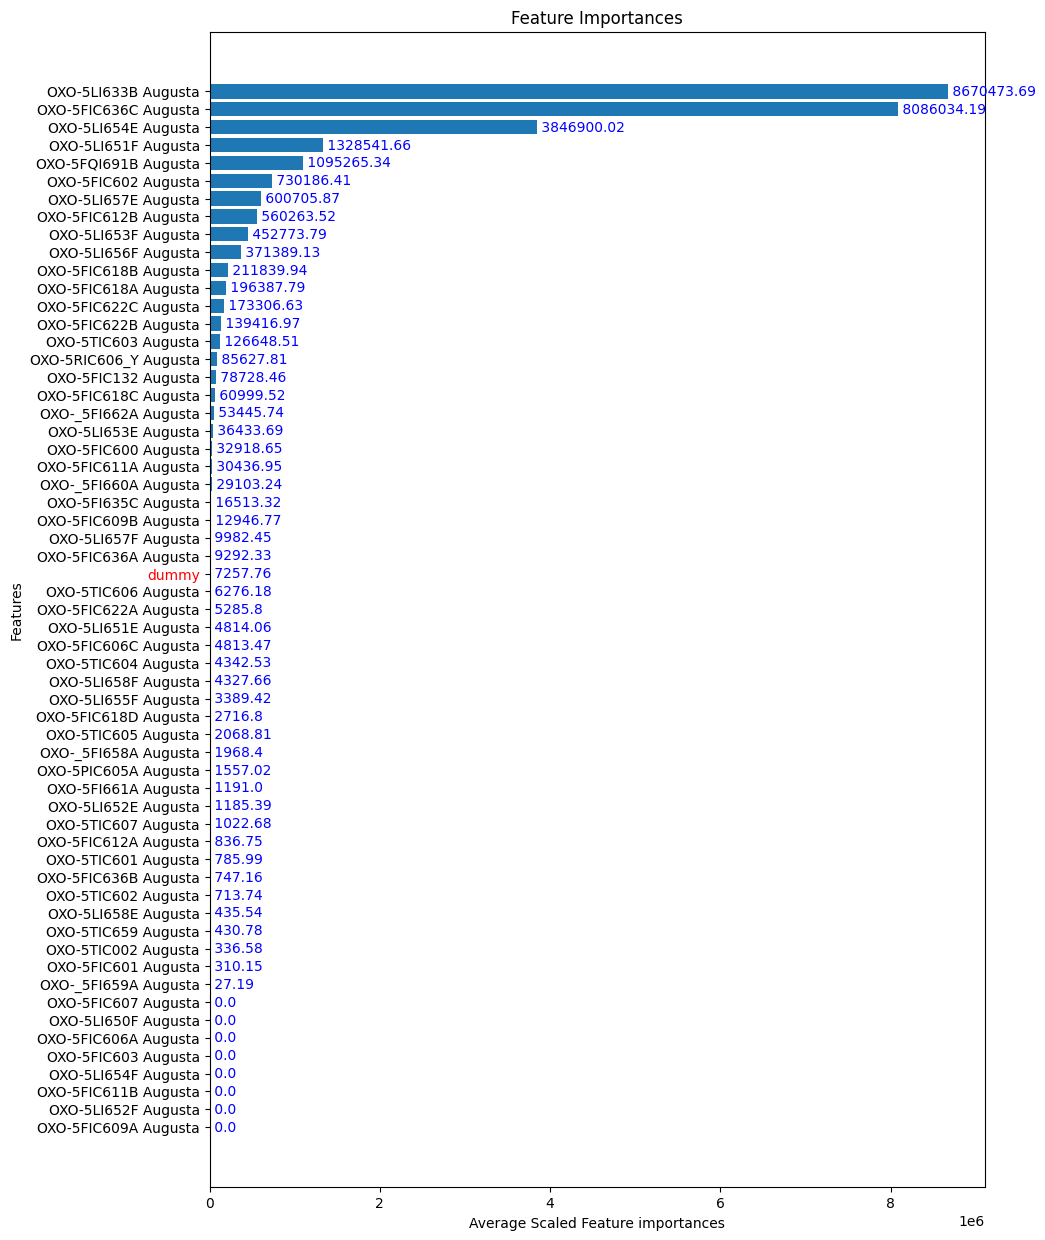

['OXO-5FI635C Augusta',
 'OXO-5FIC132 Augusta',
 'OXO-5FIC600 Augusta',
 'OXO-5FIC602 Augusta',
 'OXO-5FIC609B Augusta',
 'OXO-5FIC611A Augusta',
 'OXO-5FIC612B Augusta',
 'OXO-5FIC618A Augusta',
 'OXO-5FIC618B Augusta',
 'OXO-5FIC618C Augusta',
 'OXO-5FIC622B Augusta',
 'OXO-5FIC622C Augusta',
 'OXO-5FIC636A Augusta',
 'OXO-5FIC636C Augusta',
 'OXO-5FQI691B Augusta',
 'OXO-5LI633B Augusta',
 'OXO-5LI651F Augusta',
 'OXO-5LI653E Augusta',
 'OXO-5LI653F Augusta',
 'OXO-5LI654E Augusta',
 'OXO-5LI656F Augusta',
 'OXO-5LI657E Augusta',
 'OXO-5LI657F Augusta',
 'OXO-5RIC606_Y Augusta',
 'OXO-5TIC603 Augusta',
 'OXO-_5FI660A Augusta',
 'OXO-_5FI662A Augusta']

In [ ]:
data_exp = DataExploration()
df = data_exp.load_data('./data/sasol_data_sample.csv', parse_dates=True, index_col=0)
fs = FeatureSelection(df, cfg.target_var.sasol)
selected_tags, selected_df = fs.dummy_feature_importance()
selected_tags

In [ ]:
data_exp = DataExploration()
df = data_exp.load_data('./data/sasol_data_sample.csv', parse_dates=True, index_col=0)
fs = FeatureSelection(df, cfg.target_var.sasol)
selected_tags, selected_df = fs.borutashap_feature_selection()
selected_tags

Warning there are missing values in your data !


  0%|          | 0/100 [00:00<?, ?it/s]

12 attributes confirmed important: ['OXO-5FIC636C Augusta', 'OXO-5FIC602 Augusta', 'OXO-5LI651F Augusta', 'OXO-5TIC603 Augusta', 'OXO-5LI657E Augusta', 'OXO-5FIC600 Augusta', 'OXO-5LI656F Augusta', 'OXO-5FIC618B Augusta', 'OXO-5LI633B Augusta', 'OXO-5FQI691B Augusta', 'OXO-5FIC612B Augusta', 'OXO-5LI654E Augusta']
42 attributes confirmed unimportant: ['OXO-5LI658F Augusta', 'OXO-5LI658E Augusta', 'OXO-5FIC622C Augusta', 'OXO-5FIC636A Augusta', 'OXO-5FIC611B Augusta', 'OXO-5FIC609B Augusta', 'OXO-5FIC611A Augusta', 'OXO-5TIC659 Augusta', 'OXO-5FIC601 Augusta', 'OXO-5FIC606A Augusta', 'OXO-5LI650F Augusta', 'OXO-5LI655F Augusta', 'OXO-5LI651E Augusta', 'OXO-_5FI662A Augusta', 'OXO-_5FI660A Augusta', 'OXO-5RIC606_Y Augusta', 'OXO-5FI661A Augusta', 'OXO-5LI653E Augusta', 'OXO-5TIC604 Augusta', 'OXO-5FIC612A Augusta', 'OXO-5PIC605A Augusta', 'OXO-5TIC606 Augusta', 'OXO-_5FI659A Augusta', 'OXO-_5FI658A Augusta', 'OXO-5LI654F Augusta', 'OXO-5FIC622B Augusta', 'OXO-5LI652E Augusta', 'OXO-5FIC6

['OXO-5FIC600 Augusta',
 'OXO-5FIC602 Augusta',
 'OXO-5FIC612B Augusta',
 'OXO-5FIC618B Augusta',
 'OXO-5FIC636C Augusta',
 'OXO-5FQI691B Augusta',
 'OXO-5LI633B Augusta',
 'OXO-5LI651F Augusta',
 'OXO-5LI654E Augusta',
 'OXO-5LI656F Augusta',
 'OXO-5LI657E Augusta',
 'OXO-5TIC603 Augusta']